In [12]:
import pickle
import igraph
import scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

plt.style.use('seaborn-white')
plt.rc('font', size=70) 

In [4]:
fields = ['economics', 'management', 'psychology', 'political_science', 'aps'] # cs 

In [5]:
cp = sns.color_palette("Set1")
field_color = {
    'economics': cp[0],
    'management': cp[1],
    'psychology': cp[7],
    'aps': cp[3],
    'political_science': cp[2],
    'cs': cp[4]
}
field_label = {
    'economics': 'Economics',
    'management': 'Management',
    'psychology': 'Psychology',
    'aps': 'American Physical Society',
    'political_science': 'Political Science',
    'cs': 'Computer Science'
}
field_marker = {
    'economics': 'o',
    'management': 's',
    'psychology': '^',
    'aps': '>',
    'political_science': 'd',
    'cs': '<'
    
}

# Power Inequality 

In [6]:
def mean_confidence_interval(data, confidence=0.90):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, se

/Users/nalipour/miniconda3/envs/py3simple/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nalipour/miniconda3/envs/py3simple/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nalipour/miniconda3/envs/py3simple/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/nalipour/miniconda3/envs/py3simple/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/nalipour/miniconda3/envs/py3simple/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


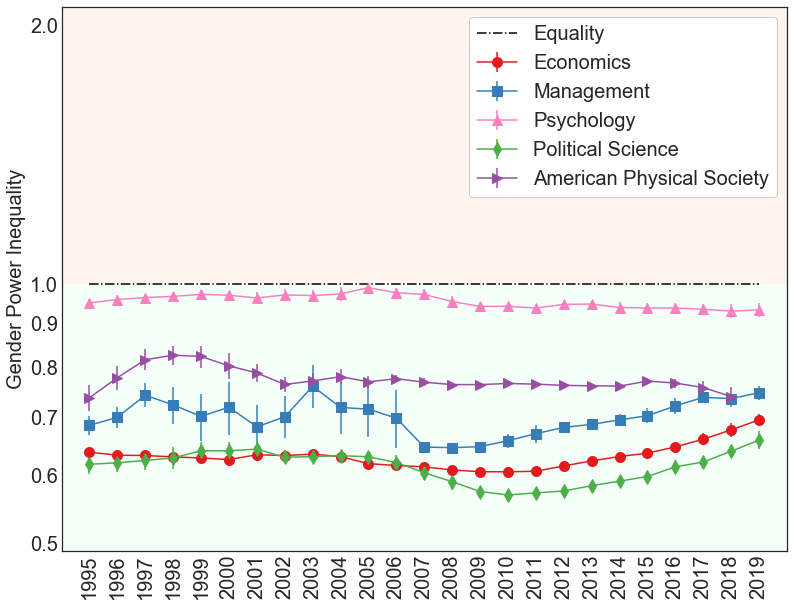

In [8]:
years = range(1990, 2020)

for y in np.arange(0, 1.0, 0.01):
    rec = Rectangle((1994, y), 2020-1994+1, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='mintcream', alpha=1, zorder=1))

for y in np.arange(1, 3, 0.01):
    rec = Rectangle((1994, y), 2020-1994+1, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='seashell', alpha=1, zorder=1))

for field in fields:
    homophily, freq, _, _ = pickle.load(open("../power/gender_{}_1990.pkl".format(field), "rb"))

    x, power = [], []
    for year in years:
        if year in homophily:
            x.append(year)
            min_min, min_maj = homophily[year]['times'][('minority', 'minority')], homophily[year]['times'][('minority', 'majority')]
            maj_maj, maj_min = homophily[year]['times'][('majority', 'majority')], homophily[year]['times'][('majority', 'minority')]
            power.append(((min_min + maj_min) / (min_min + min_maj)) / ((maj_maj + min_maj) / (maj_maj + maj_min))) # out / in 
    
    
    pw = [[] for ind in range(len(power))]
    for ind in range(len(power) - 1, 0, -1):
        pw[ind].append(power[ind])
        if ind > 2:
            pw[ind].append(power[ind - 3])
        if ind > 1:
            pw[ind].append(power[ind - 2])
        if ind > 0:
            pw[ind].append(power[ind - 1])
        
    y, yerr = [], []
    for ind in range(len(power)):
        m, h = mean_confidence_interval(pw[ind])
        y.append(m)
        yerr.append(h)
    
    plt.errorbar(x[5:], y[5:], yerr=yerr[5:], color=field_color[field], marker=field_marker[field], label=field_label[field], markersize=10)

plt.hlines(1, xmin=years[5], xmax=years[-1], linestyle='-.', label='Equality', color='black')
plt.xticks(years[5:], years[5:], rotation=90, fontsize=20)
plt.yscale('log')
tck = [0.50, 0.60, 0.70, 0.80, 0.90, 1.0, 2.0, 3.0, 4.0]
plt.yticks(tck, ["{0:.1f}".format(el) for el in tck], fontsize=20)
plt.ylabel("Gender Power Inequality", fontsize=20)
plt.legend(prop={'size': 20}, facecolor='white', framealpha=1, frameon=True)

plt.xlim(1994, 2020)
plt.ylim(0.49, 2.1)

plt.gca().grid(zorder=2, color='lightgray', linestyle='-', linewidth=2)

plt.gcf().set_size_inches(13, 10, forward=True)
plt.savefig("gender_power_gray.pdf", bbox_inches='tight')

/Users/nalipour/miniconda3/envs/py3simple/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nalipour/miniconda3/envs/py3simple/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nalipour/miniconda3/envs/py3simple/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/nalipour/miniconda3/envs/py3simple/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/nalipour/miniconda3/envs/py3simple/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


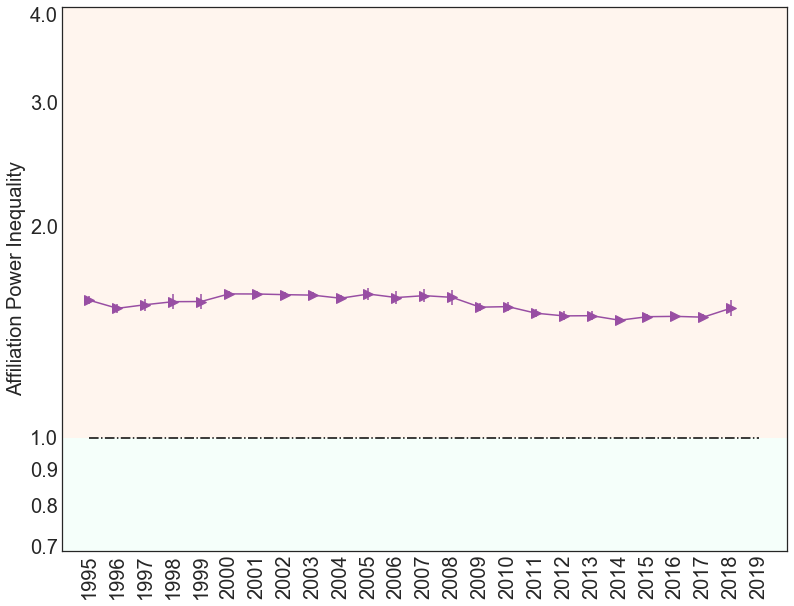

In [9]:
def mean_confidence_interval(data, confidence=0.90):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, se

years = range(1990, 2020)
cmap = matplotlib.cm.get_cmap('Reds')
for y in np.arange(0, 1.0, 0.01):
    rec = Rectangle((1994, y), 2020-1994+1, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='mintcream', alpha=1, zorder=1))

for y in np.arange(1, 5, 0.01):
    rec = Rectangle((1994, y), 2020-1994+1, 0.01)
    plt.gca().add_collection(PatchCollection([rec], facecolor='seashell', alpha=1, zorder=1))

for field in ['aps']:
    homophily, freq, _, _ = pickle.load(open("../power/affiliation_{}_1990_100.pkl".format(field), "rb"))

    x, power = [], []
    for year in years:
        if year in homophily:
            x.append(year)
            min_min, min_maj = homophily[year]['times'][('minority', 'minority')], homophily[year]['times'][('minority', 'majority')]
            maj_maj, maj_min = homophily[year]['times'][('majority', 'majority')], homophily[year]['times'][('majority', 'minority')]
            power.append(((min_min + maj_min) / (min_min + min_maj)) / ((maj_maj + min_maj) / (maj_maj + maj_min))) # out / in 
    
    
    pw = [[] for ind in range(len(power))]
    for ind in range(len(power) - 1, 0, -1):
        pw[ind].append(power[ind])
        if ind > 2:
            pw[ind].append(power[ind - 3])
        if ind > 1:
            pw[ind].append(power[ind - 2])
        if ind > 0:
            pw[ind].append(power[ind - 1])
        
    y, yerr = [], []
    for ind in range(len(power)):
        m, h = mean_confidence_interval(pw[ind])
        y.append(m)
        yerr.append(h)
    
    plt.errorbar(x[5:], y[5:], yerr=yerr[5:], color=field_color[field], marker=field_marker[field], label=field_label[field], markersize=10, zorder=3)
#     plt.errorbar(years, power, color=field_color[field], marker='o', label=field)

plt.hlines(1, xmin=years[5], xmax=years[-1], linestyle='-.', label='Equality', zorder=3, color='black')
plt.xticks(years[5:], years[5:], rotation=90, fontsize=20)
plt.yscale('log')
tck = [0.50, 0.60, 0.70, 0.80, 0.90, 1.0, 2.0, 3.0, 4.0]
plt.yticks(tck, ["{0:.1f}".format(el) for el in tck], fontsize=20)
plt.ylabel("Affiliation Power Inequality", fontsize=20)

plt.gca().grid(zorder=2, color='lightgray', linestyle='-', linewidth=2)

plt.xlim(1994, 2020)
plt.ylim(0.69, 4.1)
plt.gcf().set_size_inches(13, 10, forward=True)
plt.savefig("aff_power_gray.pdf", bbox_inches='tight')

# Networks 

In [14]:
def show_graph_circ(G, genders, plot_name):
    node_color_dict = {
        'minority': (0.7350766252941177, 0.10445963105882351, 0.17149230125490195, 1.0),
        'majority': (0.37355243129411764, 0.4974987054117647, 0.9094673695294118, 1.0)
    }
    edge_color_dict = {
        'minority': (0.7350766252941177, 0.10445963105882351, 0.17149230125490195, 0.3),
        'majority': (0.37355243129411764, 0.4974987054117647, 0.9094673695294118, 0.3)
    }
    G.vs["type"] = [genders[v['name']] =='minority' for v in G.vs]
    G.vs["color"] = [node_color_dict[genders[v['name']]] for v in G.vs]
    G.es["color"] = [edge_color_dict[genders[G.vs[edge.source]['name']]] for edge in G.es]
    visual_style = {}
    visual_style["vertex_size"] = 10
    visual_style["bbox"] = (600, 600, 0, 15)
    visual_style["margin"] = 40
    visual_style["edge_arrow_size"] = 0.5
    visual_style["edge_width"] = 1 + np.log(np.array(G.es['weight']) + 1)
    fig, ax = plt.subplots()
    li = []
    for v in G.vs:
        li.append((v['type'], v.index))
    order = [e for _, e in sorted(li)]
    output = '{}_network_circle.pdf'.format(plot_name)
    igraph.plot(G, target=output, **visual_style, layout=G.layout_circle(order=order))
    
    print ("Network saved in {}".format(output))

Network saved in gender_network_circle.pdf


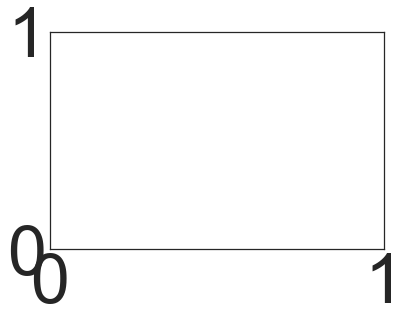

In [15]:
gen = pd.read_csv("gender_show.csv")
E = gen.groupby(['to_author', 'from_author'], as_index=False)['times'].sum()
G = igraph.Graph.TupleList(E.values, directed = True, edge_attrs=['weight'])
genders = dict(zip(gen['from_author'], gen['from_author_gender']))
genders.update(dict(zip(gen['to_author'], gen['to_author_gender'])))
show_graph_circ(G, genders, "gender")

Network saved in affiliation_network_circle.pdf


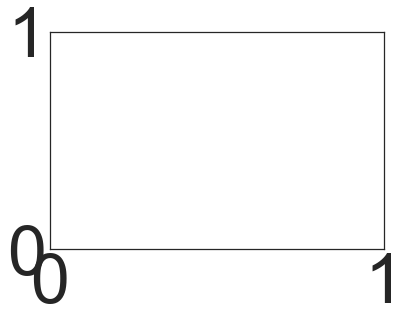

In [16]:
aff = pd.read_csv("affiliation_show.csv")
E = aff.groupby(['to_author', 'from_author'], as_index=False)['times'].sum()
G = igraph.Graph.TupleList(E.values, directed = True, edge_attrs=['weight'])
genders = dict(zip(aff['from_author'], aff['from_author_node_attr']))
genders.update(dict(zip(aff['to_author'], aff['to_author_node_attr'])))
show_graph_circ(G, genders, "affiliation")